## Clustering K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca Data 
pariwisata = pd.read_excel("pariwisata.xlsx")

In [3]:
# Menampilkan sampel data 
pariwisata.head()

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
0,ACEH,9.21,312.73,10803.0,1030136.0,43.18,28.48
1,SUMATERA UTARA,201.88,2736.09,21104.0,4850322.0,48.86,36.54
2,SUMATERA BARAT,51.83,1470.99,3786.0,1167212.0,56.00,24.75
3,RIAU,35.33,4646.98,65845.0,1413345.0,48.69,30.71
4,JAMBI,6.02,502.86,2391.0,429609.7,45.49,23.13


In [4]:
pariwisata.tail()

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
30,MALUKU,7.57,130.06,4173.0,416005.9,38.10,24.46
31,MALUKU UTARA,0.66,93.65,516.0,308029.4,50.44,23.37
32,PAPUA BARAT,19.25,243.80,1772.0,237191.0,51.16,29.42
33,PAPUA,12.58,449.56,2557.0,448181.0,50.34,32.58
34,INDONESIA,11307.43,74066.92,3283275.0,57370362.0,54.81,31.48


In [5]:
# Menghapus baris 34 "INDONESIA"
pariwisata=pariwisata.drop(34, axis=0)

In [6]:
pariwisata.tail()

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
29,SULAWESI BARAT,0.38,93.22,16.0,198274.8,49.91,18.92
30,MALUKU,7.57,130.06,4173.0,416005.9,38.10,24.46
31,MALUKU UTARA,0.66,93.65,516.0,308029.4,50.44,23.37
32,PAPUA BARAT,19.25,243.80,1772.0,237191.0,51.16,29.42
33,PAPUA,12.58,449.56,2557.0,448181.0,50.34,32.58


In [7]:
# Informasi data frame 
pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      34 non-null     object 
 1   jum_asing     34 non-null     float64
 2   jum_lokal     34 non-null     float64
 3   jum_nb_asing  34 non-null     float64
 4   jum_nb_lokal  34 non-null     float64
 5   hunian_b      34 non-null     float64
 6   hunian_nb     34 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


In [8]:
pariwisata.isnull().any()

Provinsi        False
jum_asing       False
jum_lokal       False
jum_nb_asing    False
jum_nb_lokal    False
hunian_b        False
hunian_nb       False
dtype: bool

In [9]:
pariwisata.isnull().sum()

Provinsi        0
jum_asing       0
jum_lokal       0
jum_nb_asing    0
jum_nb_lokal    0
hunian_b        0
hunian_nb       0
dtype: int64

## VISUALISASI

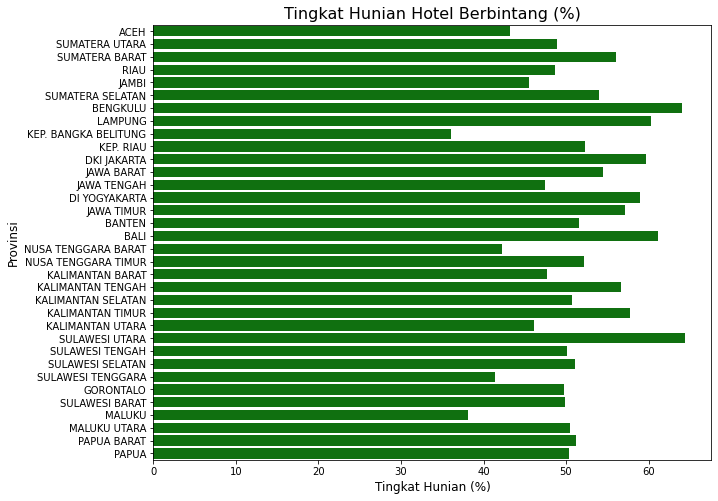

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

a = sns.barplot(x="hunian_b",y="Provinsi",data=pariwisata, color="green")

a.axes.set_title("Tingkat Hunian Hotel Berbintang (%)", fontsize=16)
a.set_xlabel ("Tingkat Hunian (%)", fontsize = 12)
a.set_ylabel ("Provinsi", fontsize = 12)
a.tick_params(labelsize = 10)

plt.show()

#save figure
fig.savefig("tingkat hunian hotel")

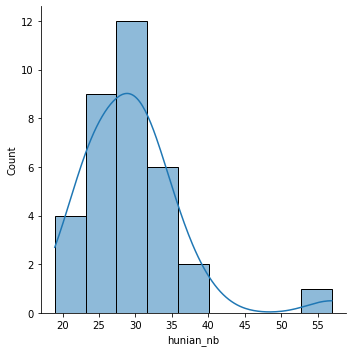

In [11]:
sns.displot(pariwisata.hunian_nb, kde=True)

# Clustering

In [12]:
pariwisata.shape

(34, 7)

In [13]:
# Menentukan variabel yang akan di clustering
x = pariwisata.iloc[:,1:7]
x.head()

,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
0,9.21,312.73,10803.0,1030136.0,43.18,28.48
1,201.88,2736.09,21104.0,4850322.0,48.86,36.54
2,51.83,1470.99,3786.0,1167212.0,56.00,24.75
3,35.33,4646.98,65845.0,1413345.0,48.69,30.71
4,6.02,502.86,2391.0,429609.7,45.49,23.13


In [14]:
# Mengubah data menjadi array 
x_array=np.array(x)
x_array

array([[9.210000e+00, 3.127300e+02, 1.080300e+04, 1.030136e+06,
        4.318000e+01, 2.848000e+01],
       [2.018800e+02, 2.736090e+03, 2.110400e+04, 4.850322e+06,
        4.886000e+01, 3.654000e+01],
       [5.183000e+01, 1.470990e+03, 3.786000e+03, 1.167212e+06,
        5.600000e+01, 2.475000e+01],
       [3.533000e+01, 4.646980e+03, 6.584500e+04, 1.413345e+06,
        4.869000e+01, 3.071000e+01],
       [6.020000e+00, 5.028600e+02, 2.391000e+03, 4.296097e+05,
        4.549000e+01, 2.313000e+01],
       [1.405000e+01, 2.013760e+03, 1.157000e+03, 1.159986e+06,
        5.399000e+01, 3.251000e+01],
       [5.600000e-01, 1.718200e+02, 5.590000e+02, 4.461405e+05,
        6.406000e+01, 2.904000e+01],
       [3.010000e+00, 7.855800e+02, 1.071000e+04, 1.207142e+06,
        6.031000e+01, 3.487000e+01],
       [9.680000e+00, 4.671600e+02, 1.750000e+02, 2.128804e+05,
        3.607000e+01, 2.078000e+01],
       [1.595590e+03, 1.504260e+03, 9.761100e+04, 1.056443e+06,
        5.231000e+01, 3.573

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Menstandarkan ukuran (scaling)
scaler = MinMaxScaler() 
x_scaled = scaler.fit_transform(x_array)

## Jumlah Cluster : Elbow Method (wws)

In [18]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse


In [19]:
wss = calculate_WSS(x_scaled, 15)
wss

[2.9880854102444747,
 1.5313390318196365,
 0.7079544303628379,
 0.4286123405740351,
 0.4048822371786375,
 0.39308848060368856,
 0.27172885166434696,
 0.316280560180497,
 0.31622556841088756,
 0.23846800386699432,
 0.16607027241042543,
 0.2387297463909203,
 0.1071832183937034,
 0.051510145993795914,
 0.038069263260267]

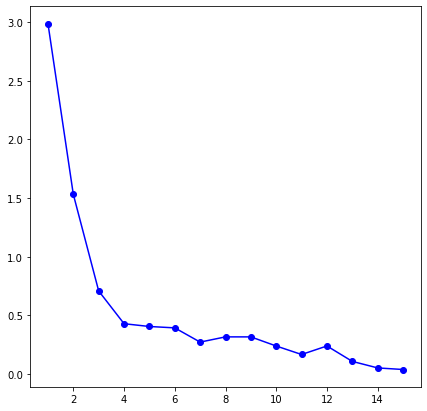

In [20]:
xx = np.arange(1, 16, 1)
plt.figure(figsize=[7,7])
plt.plot(xx, wss, "b-o")
plt.show()

## Jumlah Cluster : SilHouette 

In [28]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

def silh(X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker="o", s=85, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5055944790171516
For n_clusters = 3 The average silhouette_score is : 0.5059330053249264
For n_clusters = 4 The average silhouette_score is : 0.2903830989094578
For n_clusters = 5 The average silhouette_score is : 0.2920469548285972
For n_clusters = 6 The average silhouette_score is : 0.3017282013730017


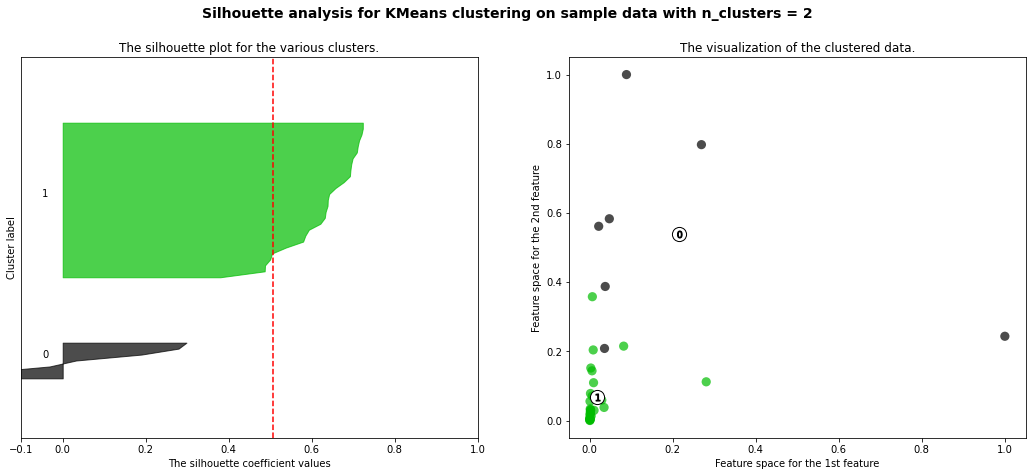

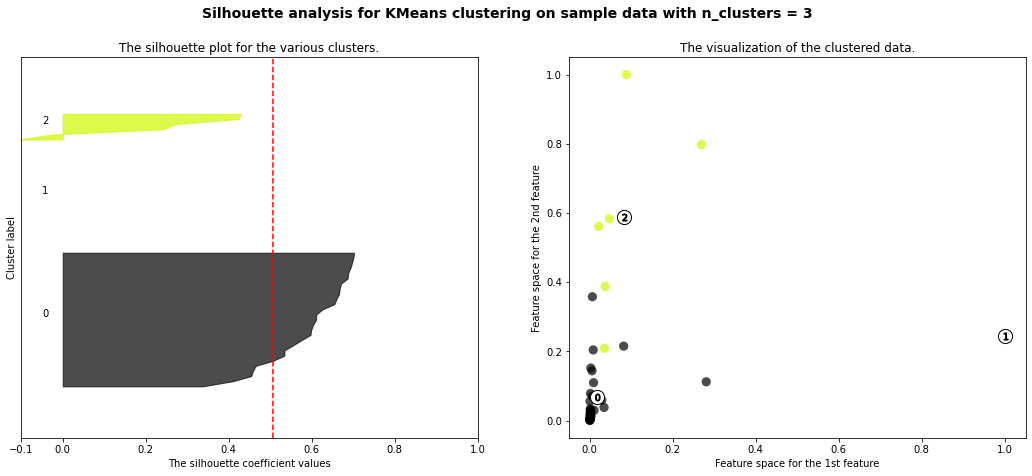

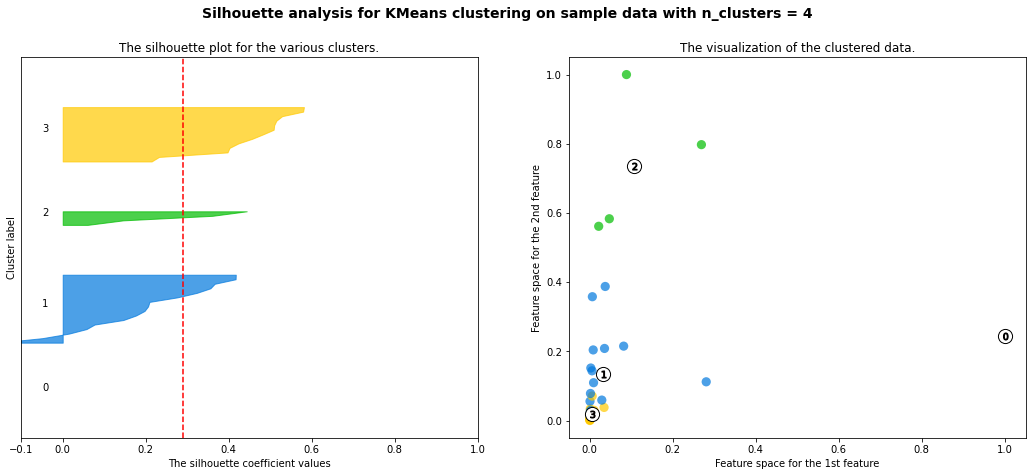

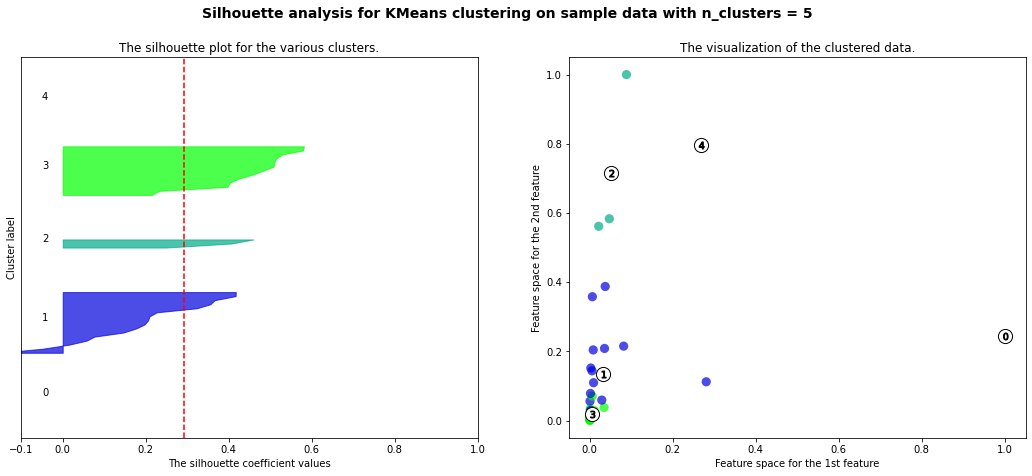

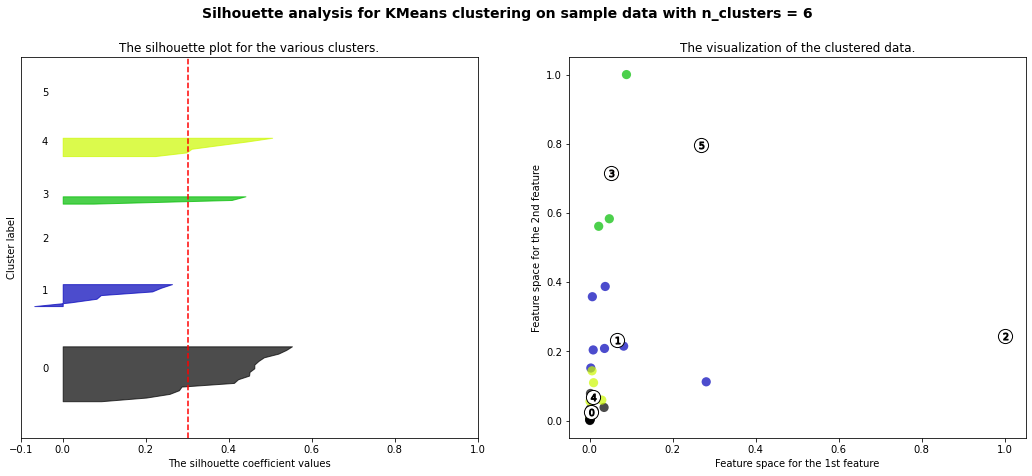

In [29]:
silh(x_scaled)

## Proses Cluster 

In [33]:
#menentukan model kmeans

kmeans = KMeans(n_clusters=3, random_state= 123)

In [34]:
#Menginputkan data 
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=123)

In [35]:
#menampilkan label cluster 
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
#menampilkan pusat cluster
kmeans.cluster_centers_

array([[0.09256218, 0.66590807, 0.01363633, 0.65669125, 0.68761031,
        0.43639232],
       [0.01868089, 0.07230719, 0.00945287, 0.08327072, 0.50492915,
        0.24164194],
       [1.        , 0.24351702, 1.        , 0.18990869, 0.88457466,
        0.41651328]])

In [37]:
#menambahkan kolom cluster ke data frame pariwisata 
pariwisata['cluster']=kmeans.labels_
pariwisata.head()

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
0,ACEH,9.21,312.73,10803.0,1030136.0,43.18,28.48,1
1,SUMATERA UTARA,201.88,2736.09,21104.0,4850322.0,48.86,36.54,1
2,SUMATERA BARAT,51.83,1470.99,3786.0,1167212.0,56.00,24.75,1
3,RIAU,35.33,4646.98,65845.0,1413345.0,48.69,30.71,1
4,JAMBI,6.02,502.86,2391.0,429609.7,45.49,23.13,1


# Profilisasi

In [38]:
#membentuk grup berdasarkan kolom cluster
grup = pariwisata.groupby('cluster')

In [40]:
profil = pd.DataFrame(grup.mean())
profil

,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
cluster,,,,,,
0,526.820000,8582.362000,3.360120e+04,6028068.800,55.550000,35.516000
1,106.626071,998.891071,2.329768e+04,906120.625,50.374643,28.109643
2,5687.800000,3186.160000,2.462937e+06,1858640.000,61.130000,34.760000


In [44]:
profil['cluster']=profil.index

In [45]:
profil

,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
cluster,,,,,,,
0,526.820000,8582.362000,3.360120e+04,6028068.800,55.550000,35.516000,0
1,106.626071,998.891071,2.329768e+04,906120.625,50.374643,28.109643,1
2,5687.800000,3186.160000,2.462937e+06,1858640.000,61.130000,34.760000,2


(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

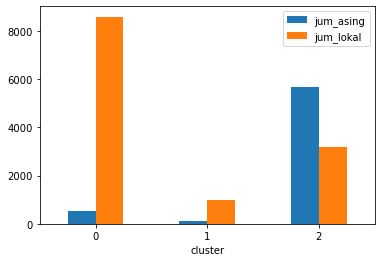

In [47]:
#membuat visualisasi 
profil.plot(x='cluster',y=['jum_asing','jum_lokal'],kind='bar')
plt.xticks(rotation=0)

profilisasi cluster :
1. kluster 0 : tinggi, jumlah wisatawan lokal yang menginap di hotel non bintang dan bintang tinggi.
2. kluster 1 : rendah, jumlah wisatawan lokal yang menginap di hotel non bintang dan bintang rendah.
3. kluster 2 : sedang, , jumlah wisatawan lokal yang menginap di hotel non bintang dan bintang sedang.

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

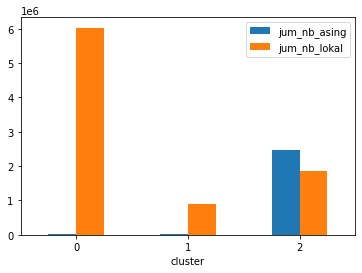

In [49]:
profil.plot(x='cluster',y=['jum_nb_asing','jum_nb_lokal'],kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

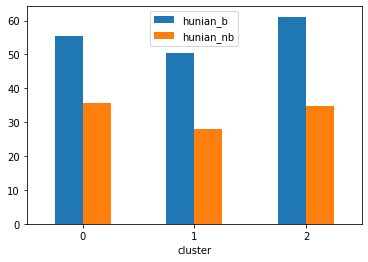

In [50]:
profil.plot(x='cluster',y=['hunian_b','hunian_nb'],kind='bar')
plt.xticks(rotation=0)

In [41]:
#Anggota cluster 0
pariwisata[pariwisata.cluster==0]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
10,DKI JAKARTA,1529.76,10262.67,5969.0,4310569.0,59.71,56.95,0
11,JAWA BARAT,502.72,12850.51,37134.0,7483742.0,54.47,29.80,0
12,JAWA TENGAH,122.15,7247.54,7861.0,5539721.0,47.46,27.67,0
13,DI YOGYAKARTA,211.50,5025.09,57837.0,3711716.0,58.91,32.21,0
14,JAWA TIMUR,267.97,7526.00,59205.0,9094596.0,57.20,30.95,0


In [42]:
#Anggota cluster 1
pariwisata[pariwisata.cluster==1]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
0,ACEH,9.21,312.73,10803.0,1030136.0,43.18,28.48,1
1,SUMATERA UTARA,201.88,2736.09,21104.0,4850322.0,48.86,36.54,1
2,SUMATERA BARAT,51.83,1470.99,3786.0,1167212.0,56.00,24.75,1
3,RIAU,35.33,4646.98,65845.0,1413345.0,48.69,30.71,1
4,JAMBI,6.02,502.86,2391.0,429609.7,45.49,23.13,1
5,SUMATERA SELATAN,14.05,2013.76,1157.0,1159986.0,53.99,32.51,1
6,BENGKULU,0.56,171.82,559.0,446140.5,64.06,29.04,1
7,LAMPUNG,3.01,785.58,10710.0,1207142.0,60.31,34.87,1
8,KEP. BANGKA BELITUNG,9.68,467.16,175.0,212880.4,36.07,20.78,1
9,KEP. RIAU,1595.59,1504.26,97611.0,1056443.0,52.31,35.73,1


In [43]:
#Anggota cluster 2
pariwisata[pariwisata.cluster==2]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
16,BALI,5687.8,3186.16,2462937.0,1858640.0,61.13,34.76,2


profilisasi cluster :
1. kluster 0 : tinggi, jumlah wisatawan lokal yang menginap di hotel non bintang dan bintang tinggi.
2. kluster 1 : rendah, jumlah wisatawan lokal yang menginap di hotel non bintang dan bintang rendah.
3. kluster 2 : sedang, , jumlah wisatawan lokal yang menginap di hotel non bintang dan bintang sedang.